In [192]:
import PyMieScatt as ps
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

## Import File

In [193]:
def graph(file):
    df = import_file(file)
    plot(df,file)

def import_file(file):
    colnames = ["Wavelength (um)","Flux (Jy)","Statistical Error (Jy)"]
    df = pd.read_csv(file,sep='\s+',skiprows=19,names=colnames)
    return df

def plot(df,file):
    #plot
    fig=plt.figure(1,figsize=(10,6))
    ax1=fig.add_subplot(111)
    ax1.plot(df["Wavelength (um)"],df["Flux (Jy)"])
    ax1.set_ylim(-1,10)
    ax1.set_xlabel("Wavelength (um)",fontsize=16)
    ax1.set_ylabel("Flux (Jy)",fontsize=16)
    ax1.set_title(file,fontsize=18)
    

Text(0.5, 1.0, 'ChaINa2_L_06-05-2002.ascii')

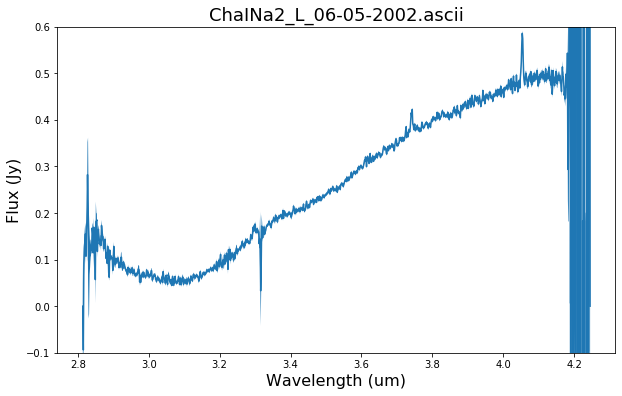

In [194]:
file = "ChaINa2_L_06-05-2002.ascii"
df = import_file(file)
#plot(df,file)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(df["Wavelength (um)"],df["Flux (Jy)"])
ax1.fill_between(df["Wavelength (um)"], 
                 df["Flux (Jy)"]+df["Statistical Error (Jy)"],
                 df["Flux (Jy)"]-df["Statistical Error (Jy)"]) #error bars
    
#ax1.set_xlim(2.7,4)
ax1.set_ylim(-0.1,0.6)

ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Flux (Jy)",fontsize=16)
ax1.set_title(file,fontsize=18)

,Wavelength (um),Flux (Jy),Statistical Error (Jy)
0,2.81430,0.000000,0.094024
1,2.81577,-0.093840,0.069721
2,2.81725,0.093229,0.036401
3,2.81872,0.124195,0.028872
4,2.82020,0.139689,0.028824
...,...,...,...
969,4.17677,0.498285,0.020359
970,4.17806,0.469957,0.022684
971,4.17934,0.474122,0.030069
972,4.18062,0.543217,0.047242


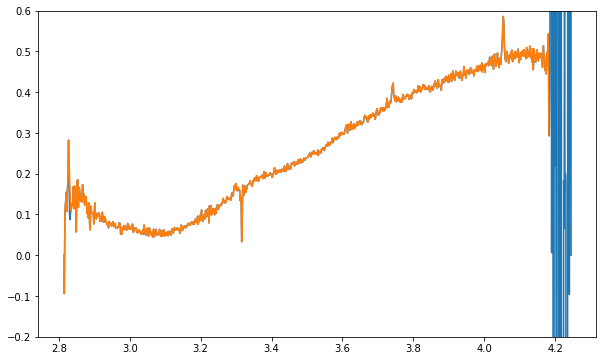

In [195]:
# exclude outliers from the data

df2 = df[df["Statistical Error (Jy)"]<0.1]

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(df["Wavelength (um)"],df["Flux (Jy)"])
ax1.plot(df2["Wavelength (um)"],df2["Flux (Jy)"])
ax1.set_ylim(-0.2,0.6)

df2

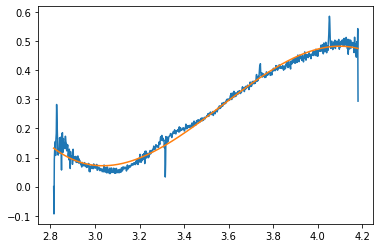

In [196]:
df1 = df[df["Wavelength (um)"]>3.4]
df1 = df1[df1["Wavelength (um)"]<4.4]

# attempt to fit a curve to the graph
x_val,y_val,err = df1["Wavelength (um)"],df1["Flux (Jy)"],df1["Statistical Error (Jy)"]
def func(x, a, b, c):
    return a*x**2 + b*x + c #polynomial fit
popt, _ = curve_fit(func, x_val, y_val)
a,b,c = popt

x_val2,y_val2,err2 = df2["Wavelength (um)"],df2["Flux (Jy)"],df2["Statistical Error (Jy)"]
def polyfunc(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d #third degree polynomial fit
popt2, _ = curve_fit(polyfunc, x_val2, y_val2)
a2,b2,c2,d2 = popt2


#plt.plot(x_val,y_val)
#plt.plot(x_val, func(x_val, *popt), 'r-')
plt.plot(x_val2,y_val2)
plt.plot(x_val2, polyfunc(x_val2, *popt2))

(-0.6, 0.6)

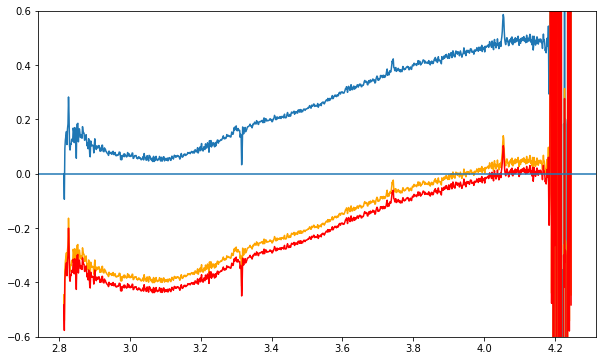

In [197]:
# subtract maximum from data
max_val1 = max(func(x_val,*popt))
max_val2 = max(polyfunc(x_val2,*popt2))

y_val_sub1 = df["Flux (Jy)"] - max_val1
y_val_sub2 = df["Flux (Jy)"] - max_val2


fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(df["Wavelength (um)"],df["Flux (Jy)"])
ax1.plot(df["Wavelength (um)"],y_val_sub1,'orange')
ax1.plot(df["Wavelength (um)"],y_val_sub2,'red')
ax1.axhline(y=0)
ax1.set_ylim(-0.6,0.6)

In [198]:
def normalize_ind(file):
    df = import_file(file)
    
    # exclude outliers from the data; limit range
    df1 = df[df["Statistical Error (Jy)"]<0.1]

    # fit curve to the data
    x_val,y_val,err = df1["Wavelength (um)"],df1["Flux (Jy)"],df1["Statistical Error (Jy)"]
    def polyfunc(x, a, b, c, d):
        return a*x**3 + b*x**2 + c*x + d #polynomial fit
    popt, _ = curve_fit(polyfunc, x_val, y_val)
    a,b,c,d = popt
    y_resid = polyfunc(x_val, *popt)
    
    # normalize (divide max flux from entire dataset)
    max_val = max(polyfunc(x_val,*popt))
    y_val_norm = df["Flux (Jy)"]/max_val
    
    
    return df["Wavelength (um)"],y_val_norm

In [199]:
def normalize(file):
    df = import_file(file)
    
    # exclude outliers from the data; limit range
    df1 = df[df["Statistical Error (Jy)"]<0.1]

    # fit curve to the data
    x_val,y_val,err = df1["Wavelength (um)"],df1["Flux (Jy)"],df1["Statistical Error (Jy)"]
    def polyfunc(x, a, b, c, d):
        return a*x**3 + b*x**2 + c*x + d #polynomial fit
    popt, _ = curve_fit(polyfunc, x_val, y_val)
    a,b,c,d = popt
    y_resid = polyfunc(x_val, *popt)
    
    # normalize (divide max flux from entire dataset)
    max_val = max(polyfunc(x_val,*popt))
    y_val_norm = df["Flux (Jy)"]/max_val
    
    df_norm = pd.DataFrame()
    df_norm["Wavelength (um)"] = df["Wavelength (um)"]
    df_norm["Flux (Jy)"] = y_val_norm
    return df_norm

In [200]:
df = normalize("ChaINa2_L_06-05-2002.ascii")
df

,Wavelength (um),Flux (Jy)
0,2.81430,0.000000
1,2.81577,-0.194408
2,2.81725,0.193141
3,2.81872,0.257294
4,2.82020,0.289393
...,...,...
1019,4.23960,-0.199019
1020,4.24083,1.384533
1021,4.24205,5.767351
1022,4.24328,9.531767


(-0.6, 1.6)

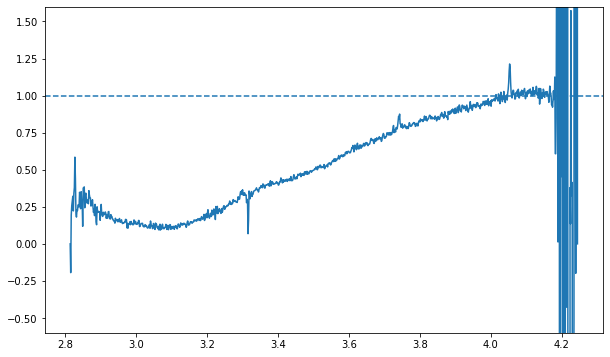

In [201]:
# check that it normalizes the max value to one

x,y = normalize_ind("ChaINa2_L_06-05-2002.ascii")

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(x,y)
ax1.axhline(y=1,ls='--')
ax1.set_ylim(-0.6,1.6)

In [202]:
df

,Wavelength (um),Flux (Jy)
0,2.81430,0.000000
1,2.81577,-0.194408
2,2.81725,0.193141
3,2.81872,0.257294
4,2.82020,0.289393
...,...,...
1019,4.23960,-0.199019
1020,4.24083,1.384533
1021,4.24205,5.767351
1022,4.24328,9.531767


In [203]:
# all files have 1024 rows

file_names = ["ChaINa2_L_06-05-2002.ascii",
              "ChaIRN_1301_jan_L.ascii",
              "ChaIRN_jan_L.ascii",
              "CRBR2422_L_02-05-2002.ascii",
              "EC82_L_07-05-2002.ascii",
              "EC90A_L_07-05-2002.ascii",
              "EC90B_L_07-05-2002.ascii",
              "Elias32_L_02-05-2002.ascii",
              "GL961E_jan_L.ascii",
              "GL961W_jan_L.ascii",
              "GL989_jan_L.ascii",
              "GSS30IRS1_L_12-09-2001.ascii",
              "HH100_L.ascii",
              "HH46_L.ascii",
              "HH46_L_TOTAL.ascii",
              "HH54_L.ascii",
              "IRAS08211_jan_L.ascii",
              "IRAS08261_jan_L.ascii",
              "IRAS08375_L.ascii",
              "IRAS08375A_1301_jan_L.ascii",
              "IRAS08375B_1301_jan_L.ascii",
              "IRAS08448_jan_L.ascii",
              "IRAS08470_jan_L.ascii",
              "IRAS09017_jan_L.ascii",
              "IRAS11068_jan_L.ascii",
              "IRS42_L_13-08-2001.ascii",
              "IRS43_L_02-05-2002.ascii",
              "IRS44_L_02-05-2002.ascii",
              "IRS46_L_02-05-2002.ascii",
              "IRS48_L_05-05-2002.ascii",
              "IRS51_L_03-09-2001.ascii",
              "IRS54_L_05-05-2002.ascii",
              "IRS63_L_21-08-2001.ascii",
              "L1489_jan_L.ascii",
              "L1489_L_23-08-2002.ascii",
              "LLN20_L_15-11-2001.ascii",
              "LLN33_L_13-11-2001.ascii",
              "LLN47_L_11-11-2001.ascii",
              "LMCP2_L_15-11-2001.ascii",
              "NGC3576A_L_06-05-2002.ascii",
              "NGC3576B_L_06-05-2002.ascii",
              "RCRAIRA5A_L_07-05-2002.ascii",
              "RCRAIRA5B_L_07-05-2002.ascii",
              "RCRAIRS7A_L_04-07-2002.ascii",
              "RCRAIRS7B_L_04-07-2002.ascii",
              "Reipurth50_L.ascii",
              "SVS4-10_L.ascii",
              "SVS4-12_L.ascii",
              "SVS4-2_L.ascii",
              "SVS4-3_L.ascii",
              "SVS4-4_L.ascii",
              "SVS4-5_L_07-05-2002.ascii",
              "SVS4-6_L.ascii",
              "SVS4-7_L.ascii",
              "SVS4-8_L.ascii",
              "SVS4-9_L_07-05-2002.ascii",
              "T42_L.ascii",
              "TPSC1_L_13-11-2001.ascii",
              "TPSC78_L_13-11-2001.ascii",
              "VSSG17_L_02-05-2002.ascii",
              "VSSG1_L_07-05-2001.ascii",
 #             "VVSer_set1_L.ascii",
              "W33A_L_04-08-2001.ascii",
              "WL12_L_07-05-2002.ascii",
              "WL16_L_07-05-2002.ascii",
              "WL20_L_02-05-2002.ascii",
              "WL20E_L_02-05-2002.ascii"]

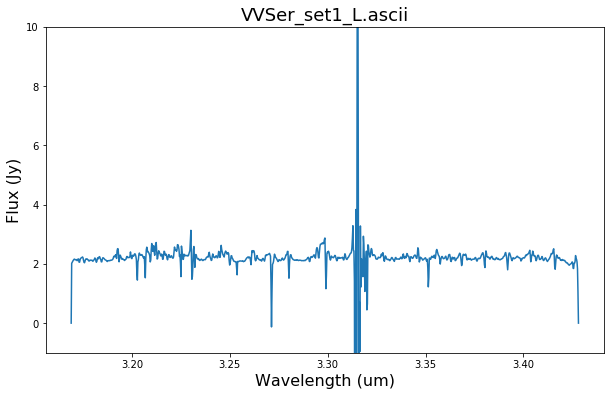

In [204]:
graph("VVSer_set1_L.ascii")

Text(0.5, 1.0, 'ChaINa2_L_06-05-2002.ascii')

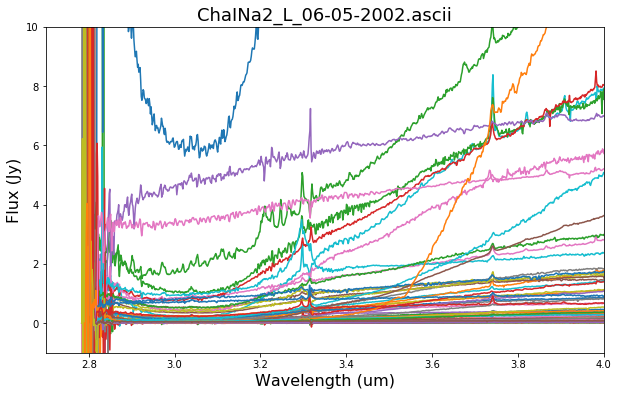

In [205]:
fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
for name in file_names:
    df = import_file(name)
    ax1.plot(df["Wavelength (um)"],df["Flux (Jy)"])
    
ax1.set_xlim(2.7,4)
ax1.set_ylim(-1,10)

ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Flux (Jy)",fontsize=16)
ax1.set_title(file,fontsize=18)

Text(0.5, 1.0, 'ChaINa2_L_06-05-2002.ascii')

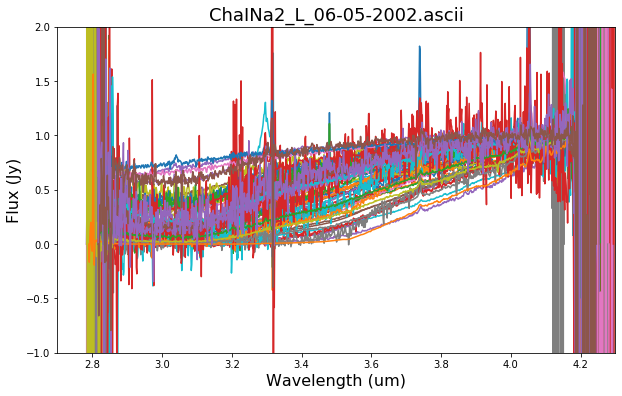

In [206]:
### normalize

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
for name in file_names:
    x,y = normalize_ind(name)
    ax1.plot(x,y)
    
ax1.set_xlim(2.7,4.3)
ax1.set_ylim(-1,2)

ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Flux (Jy)",fontsize=16)
ax1.set_title(file,fontsize=18)

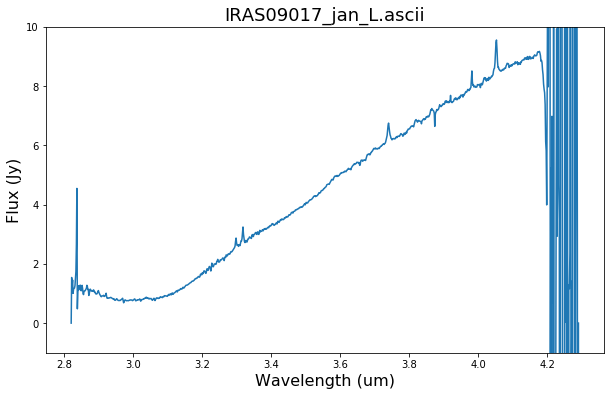

In [207]:
graph(file_names[23])

In [208]:
df_all = pd.DataFrame()
for name in file_names:
    wave,flux = normalize_ind(name)
    df_all["wave "+str(name)] = wave
    df_all["flux "+str(name)] = flux

In [209]:
df_all

,wave ChaINa2_L_06-05-2002.ascii,flux ChaINa2_L_06-05-2002.ascii,wave ChaIRN_1301_jan_L.ascii,flux ChaIRN_1301_jan_L.ascii,wave ChaIRN_jan_L.ascii,flux ChaIRN_jan_L.ascii,wave CRBR2422_L_02-05-2002.ascii,flux CRBR2422_L_02-05-2002.ascii,wave EC82_L_07-05-2002.ascii,flux EC82_L_07-05-2002.ascii,...,wave W33A_L_04-08-2001.ascii,flux W33A_L_04-08-2001.ascii,wave WL12_L_07-05-2002.ascii,flux WL12_L_07-05-2002.ascii,wave WL16_L_07-05-2002.ascii,flux WL16_L_07-05-2002.ascii,wave WL20_L_02-05-2002.ascii,flux WL20_L_02-05-2002.ascii,wave WL20E_L_02-05-2002.ascii,flux WL20E_L_02-05-2002.ascii
0,2.81430,0.000000,2.81982,0.000000,2.82174,0.000000,2.82118,0.000000,2.82058,0.000000,...,2.78994,0.000000,2.81691,0.000000,2.81691,0.000000,2.81691,0.000000,2.81691,0.000000
1,2.81577,-0.194408,2.82121,0.090269,2.82314,0.896000,2.82249,-0.887618,2.82198,0.740056,...,2.79135,-0.166408,2.81837,0.100875,2.81837,0.502077,2.81837,1.508030,2.81837,-0.659743
2,2.81725,0.193141,2.82260,0.769242,2.82454,0.139529,2.82381,-1.484745,2.82339,0.660605,...,2.79277,0.047983,2.81983,0.098938,2.81983,0.542139,2.81983,1.145209,2.81983,-0.339561
3,2.81872,0.257294,2.82399,0.876824,2.82595,0.134496,2.82512,-0.566130,2.82480,0.470853,...,2.79418,0.146631,2.82129,0.097719,2.82129,0.537356,2.82129,0.788254,2.82129,0.318077
4,2.82020,0.289393,2.82538,0.704532,2.82735,-0.075741,2.82644,-0.087383,2.82620,0.537375,...,2.79559,0.199264,2.82274,0.103092,2.82274,0.498575,2.82274,0.308809,2.82274,0.363001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,4.23960,-0.199019,4.29429,59.795196,4.28862,94.713696,4.29855,386.671842,4.24270,-13.889212,...,4.22072,-0.220417,4.24017,-31.992420,4.24017,10.280936,4.24017,-41.203213,4.24017,-23.013267
1020,4.24083,1.384533,4.29588,-11.030878,4.29016,-100.036706,4.30039,-97.205825,4.24394,-15.868970,...,4.22206,-0.095983,4.24139,-16.737068,4.24139,29.535722,4.24139,-68.186607,4.24139,-10.561647
1021,4.24205,5.767351,4.29748,38.699656,4.29169,-201.793698,4.30222,-264.683509,4.24518,-8.663306,...,4.22340,-0.648005,4.24261,56.909662,4.24261,6.602041,4.24261,-579.023412,4.24261,42.589625
1022,4.24328,9.531767,4.29907,55.793171,4.29322,-49.350750,4.30406,21.230184,4.24642,-2.582588,...,4.22474,-0.207840,4.24383,79.093161,4.24383,-3.566722,4.24383,-0.199380,4.24383,7.426912


In [210]:
def wave_append(df1,df2):
    #add empty columns to each dataframe
    df1_nan = df1.reindex(columns=df1.columns.tolist()+df2.columns.tolist())
    df2_nan = df2.reindex(columns=df1.columns.tolist()+df2.columns.tolist())

    #append dataframes and sort rows by wavelength
    df_new = df1_nan.append(df2_nan)
    df_new = df_new.T.drop_duplicates().T #drop second (identical) wavelength column
    df_new = df_new.drop_duplicates(subset='Wavelength (um)') # drop identical data
    df_new.sort_values(by="Wavelength (um)",inplace=True,ignore_index=True)

    #fill NaN with interpolation
    df_new.interpolate(method='polynomial',order=1,inplace=True)
    
    return df_new

In [211]:
file1 = "ChaINa2_L_06-05-2002.ascii"
file2 = "ChaIRN_1301_jan_L.ascii"

df1 = pd.DataFrame()
df1_raw = import_file(file1)
df1["Wavelength (um)"] = df1_raw["Wavelength (um)"]
df1["Flux (Jy) 1"] = df1_raw["Flux (Jy)"]

df2 = pd.DataFrame()
df2_raw = import_file(file2)
df2["Wavelength (um)"] = df2_raw["Wavelength (um)"]
df2["Flux (Jy) 2"] = df2_raw["Flux (Jy)"]


In [212]:
#add duplicate wavelength column and empty flux column to each dataframe
df1_nan = df1.reindex(columns=df1.columns.tolist()+df2.columns.tolist())
df2_nan = df2.reindex(columns=df1.columns.tolist()+df2.columns.tolist())

#append dataframes and sort rows by wavelength
df_new = df1_nan.append(df2_nan)
df_new = df_new.T.drop_duplicates().T #drop second (identical) wavelength column
df_new = df_new.drop_duplicates(subset='Wavelength (um)') # drop identical data
df_new.sort_values(by="Wavelength (um)",inplace=True,ignore_index=True)

#fill NaN with interpolation
df_new.interpolate(method='polynomial',order=1,inplace=True)

#fig=plt.figure(1,figsize=(10,6))
#ax1=fig.add_subplot(111)
#ax1.plot(df_new["Wavelength (um)"],df_new["Flux (Jy) 1"],'o')
#ax1.plot(df_new["Wavelength (um)"],df_new["Flux (Jy) 2"],'o')
#ax1.set_xlim(3.05,3.10)

df_new

,Wavelength (um),Flux (Jy) 1,Flux (Jy) 2
0,2.81430,0.000000,NaN
1,2.81577,-0.093840,NaN
2,2.81725,0.093229,NaN
3,2.81872,0.124195,NaN
4,2.81982,0.131942,0.00000
...,...,...,...
2039,4.29429,NaN,12.71200
2040,4.29588,NaN,-2.34508
2041,4.29748,NaN,8.22725
2042,4.29907,NaN,11.86120


In [213]:
file1 = "ChaINa2_L_06-05-2002.ascii"
file2 = "ChaIRN_1301_jan_L.ascii"

df1 = pd.DataFrame()
df1_raw = import_file(file1)
df1["Wavelength (um)"] = df1_raw["Wavelength (um)"]
df1["Flux (Jy) 1"] = df1_raw["Flux (Jy)"]

df2 = pd.DataFrame()
df2_raw = import_file(file2)
df2["Wavelength (um)"] = df2_raw["Wavelength (um)"]
df2["Flux (Jy) 2"] = df2_raw["Flux (Jy)"]

df1_nan = df1.reindex(columns=df1.columns.tolist()+df2.columns.tolist())
df2_nan = df2.reindex(columns=df1.columns.tolist()+df2.columns.tolist())

#append dataframes and sort rows by wavelength
df_new = df1_nan.append(df2_nan)
df_new = df_new.T.drop_duplicates().T #drop second (identical) wavelength column
df_new = df_new.drop_duplicates(subset='Wavelength (um)') # drop identical data
df_new.sort_values(by="Wavelength (um)",inplace=True,ignore_index=True)

#fill NaN with interpolation
df_new.interpolate(method='polynomial',order=1,inplace=True)

    

In [214]:
# create initial df
i = 0
df_all = pd.DataFrame()
df_raw = import_file(file_names[i])
df_all["Wavelength (um)"] = df_raw["Wavelength (um)"]
df_all["Flux (Jy) "+str(i)] = df_raw["Flux (Jy)"]

# # add data from every file as new columns
# for i in range(1,len(file_names)):
#     # import new data into new dataframe df_append
#     df_append = pd.DataFrame()
#     df_raw = import_file(file_names[i]) 
#     df_append["Wavelength (um)"] = df_raw["Wavelength (um)"]
#     df_append["Flux (Jy) "+str(i)] = df_raw["Flux (Jy)"]
    
#     df_all_nan = df_all.reindex(columns=df_all.columns.tolist()+df_append.columns.tolist())
#     df_append_nan = df_append.reindex(columns=df_all.columns.tolist()+df_append.columns.tolist())

#     # append dataframes and sort rows by wavelength
#     df_new = df_all_nan.append(df_append_nan)
#     df_new = df_new.T.drop_duplicates().T #drop second (identical) wavelength column
#     df_new = df_new.drop_duplicates(subset='Wavelength (um)') # drop identical data
#     df_new.sort_values(by="Wavelength (um)",inplace=True,ignore_index=True)
    
#     # fill NaN with interpolation
#     df_new.interpolate(method='polynomial',order=1,inplace=True)
    
#     # set new df_all
#     df_all = df_new

    

In [215]:
df_all

# why is it skipping 1/3 of the columns?

# wavelength range (2.78319,4.30590)

,Wavelength (um),Flux (Jy) 0
0,2.81430,0.000000
1,2.81577,-0.093840
2,2.81725,0.093229
3,2.81872,0.124195
4,2.82020,0.139689
...,...,...
1019,4.23960,-0.096066
1020,4.24083,0.668309
1021,4.24205,2.783880
1022,4.24328,4.600950


In [216]:
# fig=plt.figure(1,figsize=(10,6))
# ax1=fig.add_subplot(111)
# for i in range(6):
#     ax1.plot(df_all["Wavelength (um)"],df_all["Flux (Jy)"+str(i)],'o')
# ax1.set_xlim(3.05,3.052)
# ax1.set_ylim(0,0.3)

(0, 4)

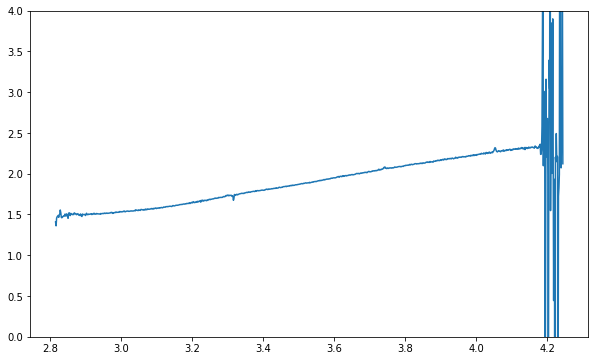

In [217]:
# plot average data

avg_flux = df_all.mean(axis=1)
fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(df_all["Wavelength (um)"],avg_flux)
ax1.set_ylim(-0,4)

In [218]:
# wavelength range (2.8,4.2)


### try using np.interp

np.interp(x,xp,fp)
- x = x-coordinates at which to evaluate the interpolated values
- xp = x-coords of data
- fp = y-coords of data

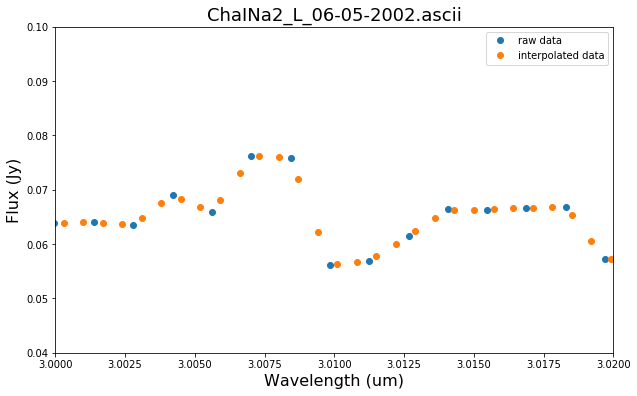

In [219]:
waves = np.linspace(2.8,4.2,num=2000)

df = import_file("ChaINa2_L_06-05-2002.ascii")
wd = df["Wavelength (um)"]
fd = df["Flux (Jy)"]
fd_int = np.interp(waves,wd,fd)

# plot
fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(wd,fd,'o',label="raw data")
ax1.plot(waves,fd_int,'o',label="interpolated data")
    
#ax1.set_ylim(-0.1,0.6)
ax1.set_xlim(3.0,3.02)
ax1.set_ylim(0.04,0.1)

ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Flux (Jy)",fontsize=16)
ax1.set_title(file,fontsize=18)
ax1.legend()

In [220]:
normalize(file_names[0])

,Wavelength (um),Flux (Jy)
0,2.81430,0.000000
1,2.81577,-0.194408
2,2.81725,0.193141
3,2.81872,0.257294
4,2.82020,0.289393
...,...,...
1019,4.23960,-0.199019
1020,4.24083,1.384533
1021,4.24205,5.767351
1022,4.24328,9.531767


In [221]:
### combine all files into df_all

waves = np.linspace(2.8,4.2,num=2000)

df_all = pd.DataFrame()
df_all["Wavelength (um)"] = waves
for i in range(len(file_names)):
    df = normalize(file_names[i]) # or import_file(file_names[i])
    wd = df["Wavelength (um)"]
    fd = df["Flux (Jy)"]
    fd_int = np.interp(waves,wd,fd)
    df_all["Flux (Jy) "+str(i)] = fd_int
    
df_all

,Wavelength (um),Flux (Jy) 0,Flux (Jy) 1,Flux (Jy) 2,Flux (Jy) 3,Flux (Jy) 4,Flux (Jy) 5,Flux (Jy) 6,Flux (Jy) 7,Flux (Jy) 8,...,Flux (Jy) 56,Flux (Jy) 57,Flux (Jy) 58,Flux (Jy) 59,Flux (Jy) 60,Flux (Jy) 61,Flux (Jy) 62,Flux (Jy) 63,Flux (Jy) 64,Flux (Jy) 65
0,2.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.130693,0.444923,0.000000,0.000000,0.000615,0.000000,0.000000,0.000000,0.000000
1,2.800700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.326359,-2.053760,0.000000,0.000000,0.274770,0.000000,0.000000,0.000000,0.000000
2,2.801401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-6.952888,-4.626755,0.000000,0.000000,0.604716,0.000000,0.000000,0.000000,0.000000
3,2.802101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-24.151634,-6.086963,0.000000,0.000000,1.138145,0.000000,0.000000,0.000000,0.000000
4,2.802801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-40.117428,-7.338641,0.000000,0.000000,1.430926,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.197199,4.366642,0.402209,2.205906,1.011391,-262.754144,-2.654706,-0.533928,-2.226860,-1.228934,...,-2.186463,0.078452,2.054451,-10.433698,5.429632,0.357847,5.274696,-5.115929,17.538109,-20.104908
1996,4.197899,2.193884,0.538769,4.233287,1.044413,-279.352512,-2.889055,-1.770866,1.110491,-11.014530,...,-0.649235,-0.629873,1.643469,-12.966055,1.813897,0.399853,0.894164,-2.615359,40.685975,-37.977165
1997,4.198599,0.652852,0.675329,12.121365,1.033269,-262.201293,-2.282421,-2.228899,2.549062,-2.335424,...,0.761488,-7.884116,-4.800765,-6.946853,4.075370,-24.598862,0.644614,-2.173136,32.903332,-51.172509
1998,4.199300,1.656198,0.644299,9.425666,1.022124,-129.430984,-53.500720,-67.078241,6.701874,8.428424,...,2.012270,3.615730,-10.552157,-2.012304,4.883238,-46.256120,0.331935,-1.905830,25.362517,-54.976315


(0.1, 1.3)

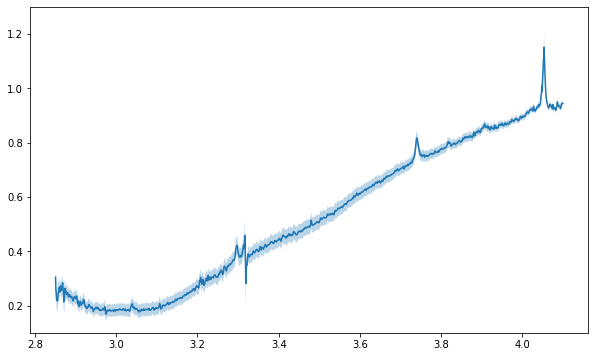

In [222]:
# exclude outliers from the data; limit range
df=df_all[df_all[df_all["Wavelength (um)"]>2.85]<4.1]

# average data across all files
df1 = df.iloc[:,1:]
avg_flux = df1.mean(axis=1)
error = df1.sem(axis=1)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(df["Wavelength (um)"],avg_flux)
ax1.fill_between(df["Wavelength (um)"],avg_flux+error,avg_flux-error,alpha=0.3)
ax1.set_ylim(0.1,1.3)


In [223]:
# plot columns from df_all

def plot_cols(start=0,end=len(file_names)):
    df=df_all[df_all[df_all["Wavelength (um)"]>2.85]<4.1]
    fig=plt.figure(1,figsize=(10,6))
    ax1=fig.add_subplot(111)

    offset = 0
    for i in range(start,end):
        wd = df["Wavelength (um)"]
        fd = df.iloc[:,i+1]
        ax1.plot(wd,fd+offset)
        offset = offset + 0.4

    ax1.set_xlim(2.7,4.3)
    ax1.set_ylim(0,5)

    ax1.set_xlabel("Wavelength (um)",fontsize=16)
    ax1.set_ylabel("Flux (Jy)",fontsize=16)
    ax1.set_title(file,fontsize=18)

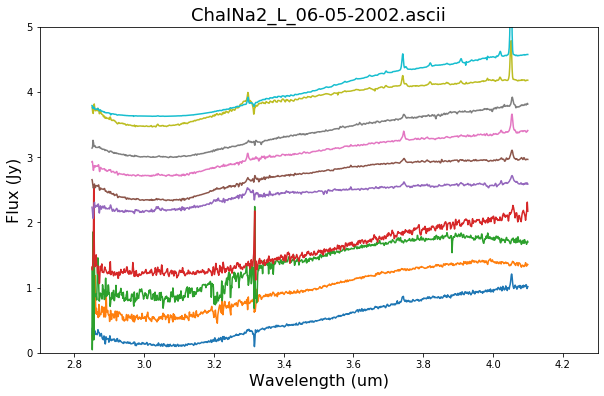

In [224]:
plot_cols(0,10)

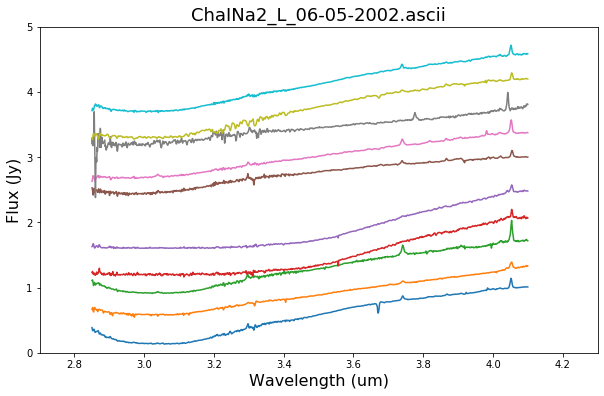

In [225]:
plot_cols(10,20)

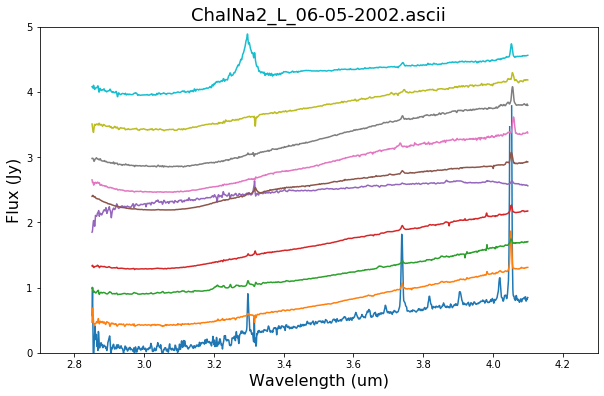

In [226]:
plot_cols(20,30)

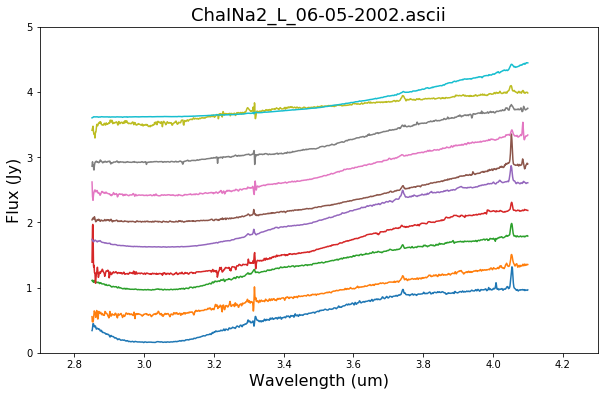

In [227]:
plot_cols(30,40)

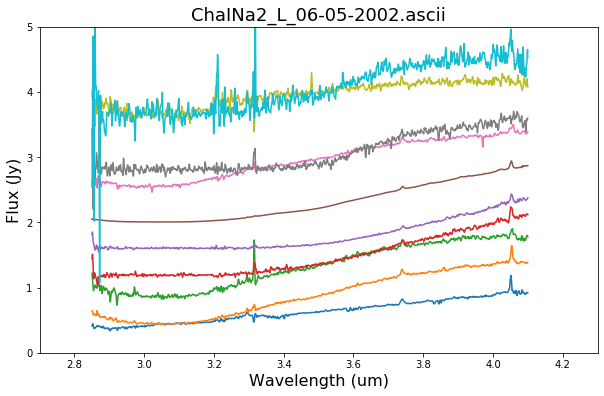

In [228]:
plot_cols(40,50)

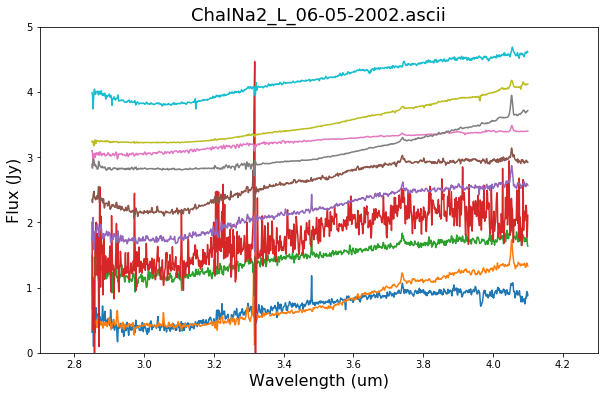

In [229]:
plot_cols(50,60)

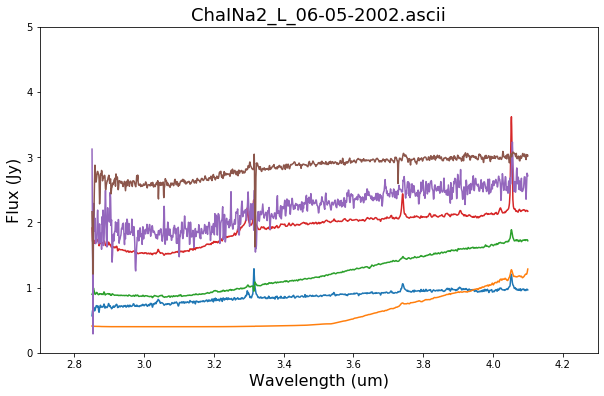

In [230]:
plot_cols(60,len(file_names))

In [231]:
# plot columns from df_all

def plot_cols(filenumbers):
    df=df_all[df_all[df_all["Wavelength (um)"]>2.85]<4.1]
    fig=plt.figure(1,figsize=(10,6))
    ax1=fig.add_subplot(111)

    offset = 0
    for i in filenumbers:
        wd = df["Wavelength (um)"]
        fd = df.iloc[:,i+1]
        ax1.plot(wd,fd+offset)
        offset = offset + 0.4

    ax1.set_xlim(2.7,4.3)
    ax1.set_ylim(0,5)

    ax1.set_xlabel("Wavelength (um)",fontsize=16)
    ax1.set_ylabel("Flux (Jy)",fontsize=16)
    ax1.set_title(file,fontsize=18)

In [232]:
print(df_all.iloc[300,:]["Wavelength (um)"])
print(df_all.iloc[1400,:]["Wavelength (um)"])

3.010105052526263
3.7804902451225613


In [233]:
# sort files by slope
slopes = []
xi = df_all.iloc[300,:]["Wavelength (um)"]
xf = df_all.iloc[1400,:]["Wavelength (um)"]
for i in range(len(file_names)):
    yi = df_all.iloc[300,:]["Flux (Jy) "+str(i)]
    yf = df_all.iloc[1400,:]["Flux (Jy) "+str(i)]
    s = (yf-yi)/(xf-xi)
    slopes.append(s)
slopes = np.array(slopes)
sort_ind = np.argsort(slopes) #returns sorted indices
sorted_names = np.array(file_names)[sort_ind] #sort file_names

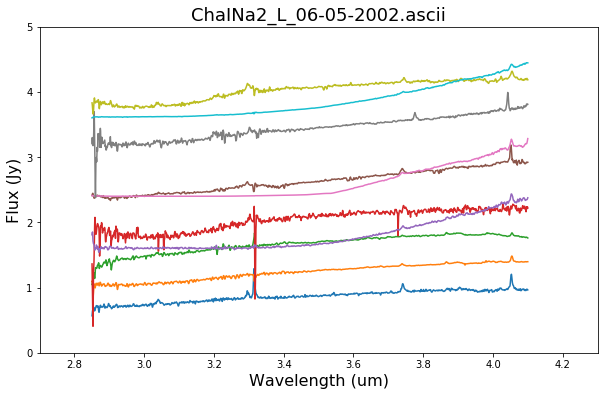

In [234]:
plot_cols(sort_ind[0:10])

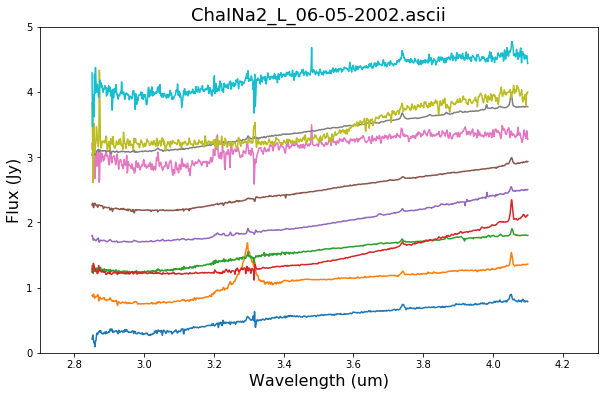

In [235]:
plot_cols(sort_ind[10:20])

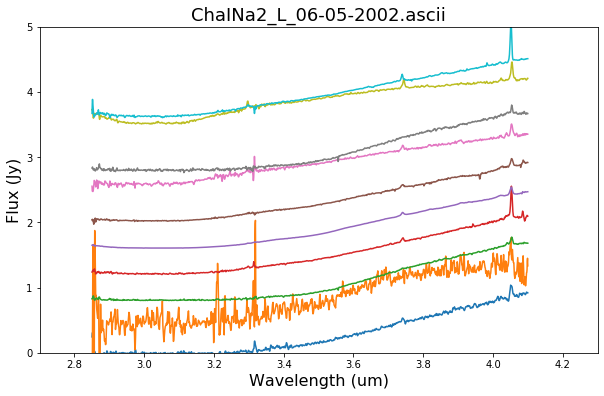

In [236]:
plot_cols(sort_ind[20:30])

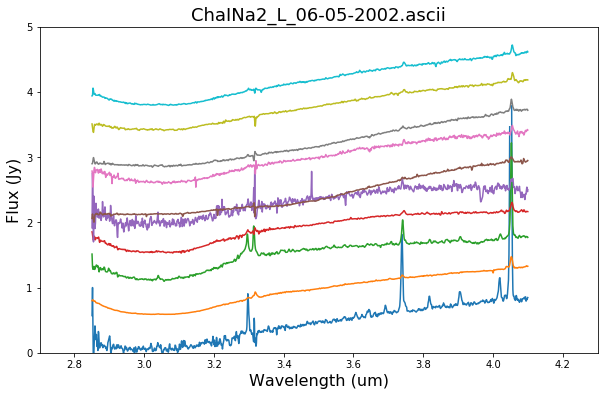

In [237]:
plot_cols(sort_ind[30:40])

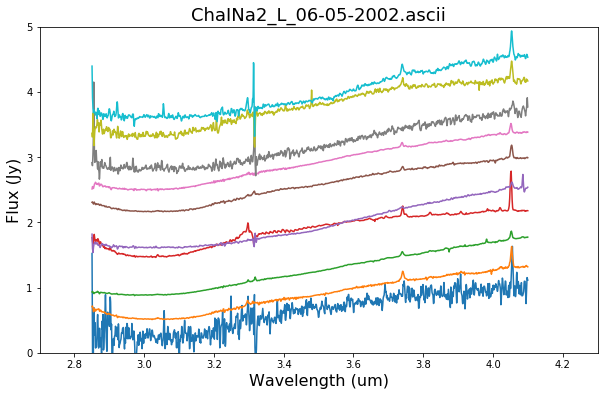

In [238]:
plot_cols(sort_ind[40:50])

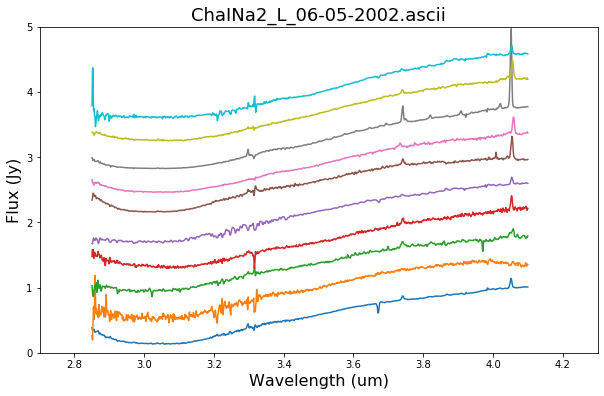

In [239]:
plot_cols(sort_ind[50:60])

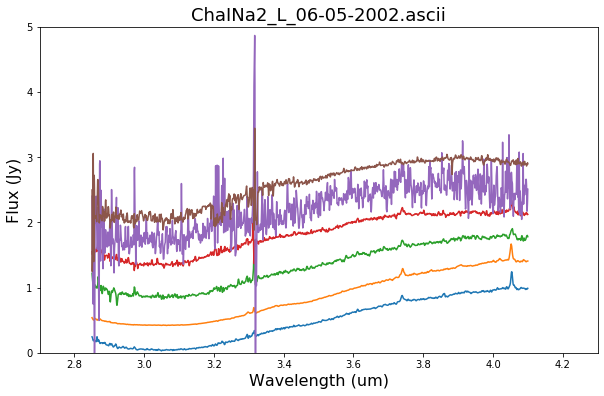

In [240]:
plot_cols(sort_ind[60:70])

Does my normalization process create artificial slopes? How can I sort the graphs by shape?

In [241]:
'''
Class to fit continua for ice spectra and derive optical depths

'''
    def fit_bb(self):
        ranges = [(2.85,3.2),(3.65,4.0)]
        fit_params = Parameters()
        fit_params.add('const',value=1e7)
        fit_params.add('const_star',value=1e7)        
        fit_params.add('temp',value=1000,min=100,max=4000)
        fit_params.add('nd',value=1e-3,max=3e-3,min=0)
        
        gsubs = []
        for range in ranges:
            gsubs = gsubs + np.where((self.wave>range[0]) & (self.wave<range[1]))[0].tolist()
        
        #self.cext_int -= np.min(self.cext_int[gsubs])
        self.cext_subs = self.cext_int[gsubs]
        
        out = minimize(self.residual_bb, fit_params, args=(self.wave[gsubs],), kws={'data':self.fd[gsubs]})
        # out function finds continuum temperature and opacity that minimizes the residual
        # uses these two parameters to create the fit model
        fit = self.residual_bb(out.params, self.wave)
        cont_params = out.params
        cont_params['nd'].value = 0.0
        # residual_bb without input data calculates the model
        cont = self.residual_bb(cont_params, self.wave)
        
        plt.plot(self.wave,self.fd)
        plt.plot(self.wave,fit)
        plt.plot(self.wave,cont)
        
        plt.show()
        
    def residual_bb(self,pars,x,data=None,cext=None):
        
        # temperature of continuum... fit to minimize residual
        bb = BlackBody(temperature=pars['temp']*u.K)
        cont = pars['const']*bb(x*u.micron).value
        
        # assume temperature of star=4000 K
        bb = BlackBody(temperature=4000*u.K)
        star = pars['const_star']*bb(x*u.micron).value
        
        # F = Fo e^(-tau)
        if data is None:
            model = (star+cont)*np.exp(-self.cext_int*pars['nd'])
            return model
        else:
            model = (star+cont)*np.exp(-self.cext_subs*pars['nd'])
        return model-data
        # finds a curve closest to the actual values of the data by using
        # a given opacity file and adjusting to find an unknown continuum temperature
        # AND constant to multiply opacity by that minimizes the result model-data
            # look at tau = kappa*nd 

IndentationError: unexpected indent (<ipython-input-241-8c0219e3c9e8>, line 5)

is there a way to do this without opacities?

Fo = star + cont
oh what the heck Blackbody() calculates Flux lol

This code uses opacities to create a model for the data. It first finds the background flux (fits a blackbody star and continuum to the data), and then uses opacity values multiplied by an unknown constant nd to find the best fit model.

maybe try model = star+cont * np.exp(tau), except make tau one of the parameters that it adjusts to minimize the output, and then returns an array of taus as a function of wavelength... Then, compare this to opacity files?



In [ ]:
df_all["Wavelength (um)"]